In [2]:
print(__doc__)

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


In [3]:
# load
boston = datasets.load_boston()

boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

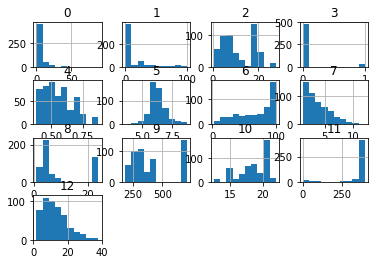

In [4]:
import pandas as pd
%matplotlib inline
boston_df = pd.DataFrame(boston.data)
boston_df.hist()
plt.show()

In [12]:
boston_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
# Use only one features
boston_X = boston.data[:, np.newaxis, 4]
boston_X

array([[0.538 ],
       [0.469 ],
       [0.469 ],
       [0.458 ],
       [0.458 ],
       [0.458 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.524 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.538 ],
       [0.499 ],
       [0.499 ],
       [0.499 ],
       [0.499 ],
       [0.428 ],
       [0.428 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.448 ],
       [0.439 ],
       [0.439 ],
       [0.439 ],
       [0.439 ],
       [0.41  ],
       [0.403 ],
       [0.41  ],
       [0.411 ],
       [0.453 

In [14]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-20]
boston_X_test = boston_X[-20:]

In [16]:
# Split the targets into training/testing sets
boston_y_train = boston.target[:-20]
boston_y_test = boston.target[-20:]

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [18]:
# Train(仕立てる、仕上げる) the model using the training sets
regr.fit(boston_X_train, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# Make predictions using the testing set
boston_y_pred = regr.predict(boston_X_test)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
     % mean_squared_error(boston_y_test, boston_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(boston_y_test, boston_y_pred))

Coefficients: 
 [-33.50740648]
Mean squared error: 31.06
Variance score: -0.33


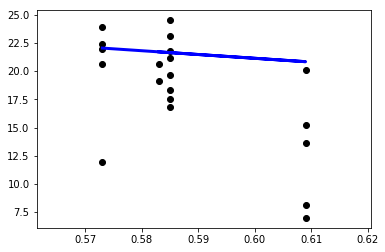

In [21]:
# Plot outputs
plt.scatter(boston_X_test, boston_y_test, color='black')
plt.plot(boston_X_test, boston_y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

単回帰　Boston House Prices